In [1]:
import numpy as np
#讓python不要顯示科學符號
np.set_printoptions(suppress=True, threshold=np.nan)
import pandas as pd
#讓python不要顯示科學符號
pd.set_option('display.max_columns', 10000, 'display.max_rows', 10000)
import matplotlib.pyplot as plt

In [2]:
datapath =r'C:\Users\User\Desktop\程式交易\歷史資料\大陸期貨連續月資料'

# 匯入大陸豆粕、豆油、豆二等資料並修改Size

In [3]:
namelist=['m-60-OpenInterest-Difference.txt','y-60-OpenInterest-Difference.txt','b-60-OpenInterest-Difference.txt']

size='D'
for i in namelist:
    data = pd.read_csv(datapath+ '\\' +i,sep = ',',engine='python',encoding = 'utf-8')
    data.columns=(['date','Open','High','Low','Close','Volume','Outstanding'])
    data['date']=pd.to_datetime(data['date'])
    data.set_index('date' , inplace=True)
    
    data_open=data.loc[:,'Open'].resample(size).first().dropna()
    data_high=data.loc[:,'High'].resample(size).max().dropna()
    data_low=data.loc[:,'Low'].resample(size).min().dropna()
    data_close=data.loc[:,'Close'].resample(size).last().dropna()
    data_volumn=data.loc[:,'Volume'].resample(size).sum().dropna()
    data_outstanding=data.loc[:,'Outstanding'].resample(size).last().dropna()
    locals()[i[:i.index('-')]+'_data']=pd.concat([data_open,data_high,data_close,data_low,data_volumn,data_outstanding],axis=1).dropna()
    locals()[i[:i.index('-')]+'_data']['Return(%)']=(locals()[i[:i.index('-')]+'_data']['Close']-locals()[i[:i.index('-')]+'_data']['Close'].shift(1))/locals()[i[:i.index('-')]+'_data']['Close'].shift(1)*100


# 找出商品資料的起迄

In [4]:
testnamelist=['m','y','b']
for k in testnamelist:
    print (k,'=',locals()[k+'_data'].index[0],'~',locals()[k+'_data'].index[-1])

m = 2003-08-04 00:00:00 ~ 2019-03-22 00:00:00
y = 2006-01-18 00:00:00 ~ 2019-03-22 00:00:00
b = 2004-12-23 00:00:00 ~ 2019-03-22 00:00:00


# 計算中國大豆壓榨利潤

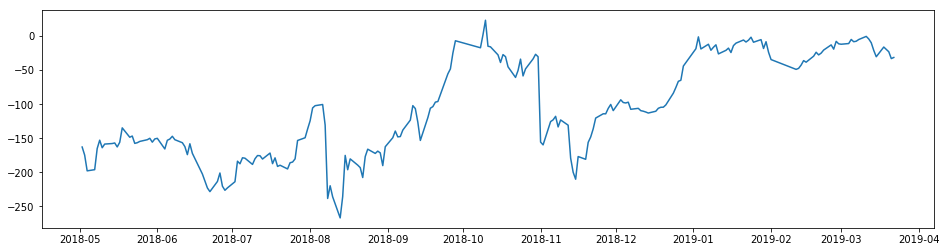

In [36]:
profit=[]
profit=pd.DataFrame(profit)
m_factor=0.73
y_factor=0.18
b_factor=1
profit = m_factor * m_data['Close'] + y_factor * y_data['Close']-b_factor*b_data['Close']
plt.figure(figsize=(16,4))
plt.plot(profit['2018/5/1':])

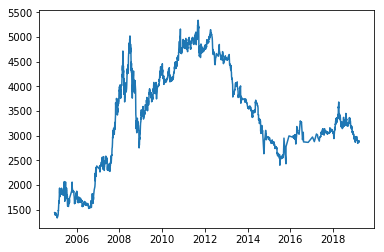

In [29]:
plt.plot(b_data['Close'])

# 用美豆經過單位換算後代替豆二以計算壓榨利潤

In [ ]:
datapath2=r'C:\Users\User\Desktop\@S-日-成交價.txt'
us_allsoybean = pd.read_csv(datapath2,sep = ',',engine='python',encoding = 'utf-8')
us_allsoybean.columns=(['date','Open','High','Low','Close','Volume'])
us_allsoybean['date']=pd.to_datetime(us_allsoybean['date'])
us_allsoybean.set_index('date' , inplace=True)

In [ ]:
df=[]
df=pd.DataFrame(df)
startday='2010/1/1'
endday='2016/12/20'
df['b']=b_data['Close'][startday:endday]
#df['us_soybean']=us_soybean['Close'][startday:endday]
df['us_allsoybean']=us_allsoybean['Close'][startday:endday]
df['m']=m_data['Close'][startday:endday]
df['m_return']=(df['m']-df['m'].shift(1))/df['m'].shift(1)
df['us_allsoybean_return']=((df['us_allsoybean']-df['us_allsoybean'].shift(1))/df['us_allsoybean'].shift(1)).shift(1)
df.corr()

In [7]:
newdata=[]
newdata=pd.DataFrame(newdata)
newdata['m']=m_data['Close']
newdata['y']=y_data['Close']
newdata['b']=b_data['Close']
newdata['profit']=profit
newdata['m5']=newdata['profit'].rolling(window=10).mean()
newdata['Deviation']=newdata['profit']-newdata['m5']
newdata=newdata.dropna()

newdata=newdata['2018/1/1':]

# profit 與 5日ma 圖

In [9]:
plt.figure(figsize=(16,4))
startDay='2010/1/1'
endDay='2010/1/31'
#plt.plot(us_allsoybean['Close'][startDay:endDay],label='us_allsoybean')
#plt.plot(m_data['Close'][startDay:endDay],label='m')
plt.p
plt.legend(loc='upper right')

AttributeError: module 'matplotlib.pyplot' has no attribute 'p'

<Figure size 1152x288 with 0 Axes>

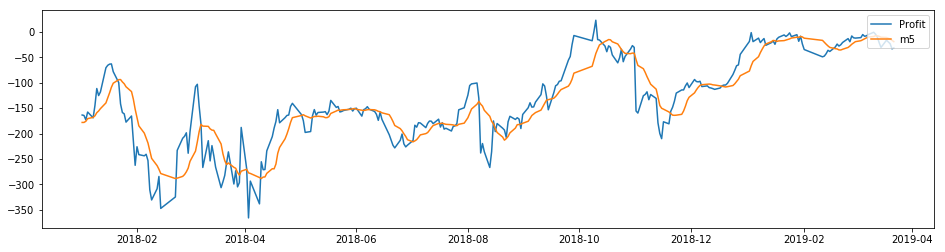

In [10]:
plt.figure(figsize=(16,4))
startDay='2010/1/1'
plt.plot(newdata['profit'][startDay:],label='Profit')
plt.plot(newdata['m5'][startDay:],label='m5')
plt.legend(loc='upper right')

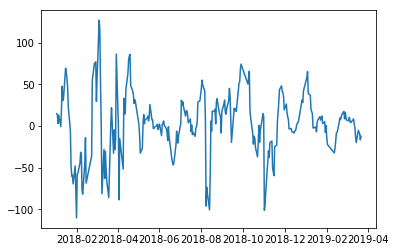

In [11]:
plt.plot(newdata['Deviation'])

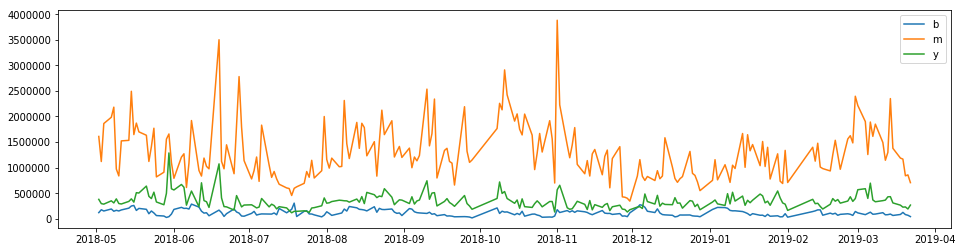

In [12]:
plt.figure(figsize=(16,4))
startDay='2018/5/1'
plt.plot(b_data[startDay:]['Volume'],label='b')
plt.plot(m_data[startDay:]['Volume'],label='m')
plt.plot(y_data[startDay:]['Volume'],label='y')
plt.legend(loc='upper right')

# 交易回測

openLimit=5
closeLimit=20

newdata['open']=newdata.apply(lambda x:1 if x['Deviation']>openLimit else -1,axis=1)
newdata['close']=newdata.apply(lambda x:1 if x['Deviation']<closeLimit else -1,axis=1)
newdata['Signal']=newdata['open']+newdata['close']
newdata

newdata=newdata.dropna()
e=newdata['Signal']-newdata['Signal'].shift(1)  
enonan = np.where(np.isnan(e),0,e)
abs_enonan=abs(enonan)          
newdata["Signal_change"]=enonan
newdata["Signal_change"]=-(abs_enonan/2)  
newdata["滑價"]=(newdata["Signal_change"].shift(1))*1200      
newdata["Signal_change"]=newdata["Signal_change"].replace(to_replace=0, value=1) 
newdata

# 匯出資料

In [13]:
datapath5 =r'C:\Users\User\Desktop\利潤.csv'
newdata.to_csv(datapath5,sep=',',)

# 畫出大豆、豆粕、豆油的歷史交易量

m = 2003-08-04 09:03:00 ~ 2019-03-22 15:00:00  
y = 2006-01-18 10:41:00 ~ 2019-03-22 15:00:00  
b = 2004-12-23 09:02:00 ~ 2019-03-22 15:00:00

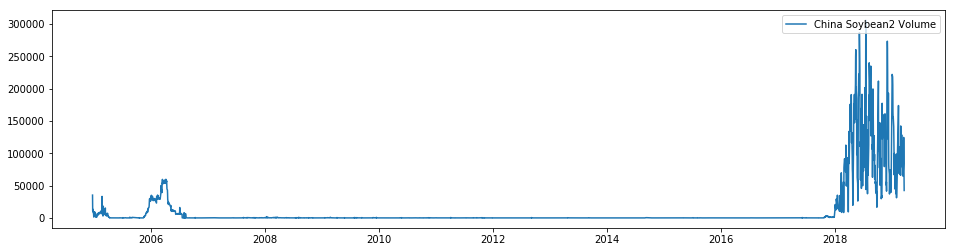

In [14]:
m_volume=m_data['Volume']['2003/8/4':'2019/3/22']
y_volume=y_data['Volume']['2006/1/18':'2019/3/22']
b_volume=b_data['Volume']['2004/12/23':'2019/3/22']
plt.figure(figsize=(16,4))
startDay='2018/5/1'
plt.plot(b_volume,label='China Soybean2 Volume')
plt.legend(loc='upper right')

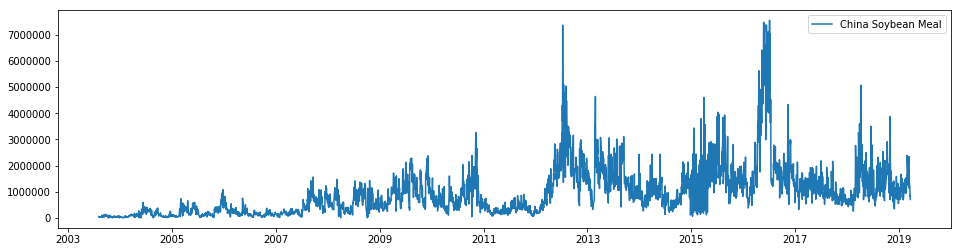

In [15]:
plt.figure(figsize=(16,4))
plt.plot(m_volume,label='China Soybean Meal')
plt.legend(loc='upper right')

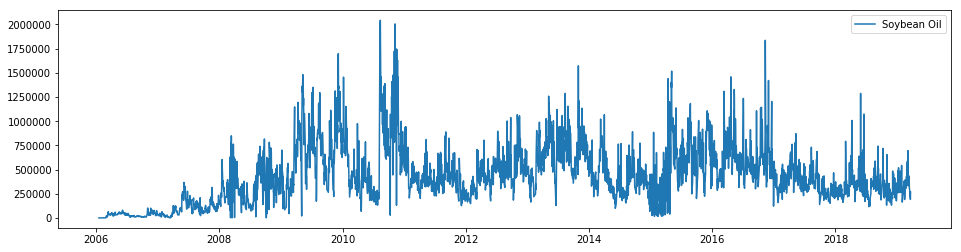

In [16]:
plt.figure(figsize=(16,4))
plt.plot(y_volume,label='Soybean Oil')
plt.legend(loc='upper right')

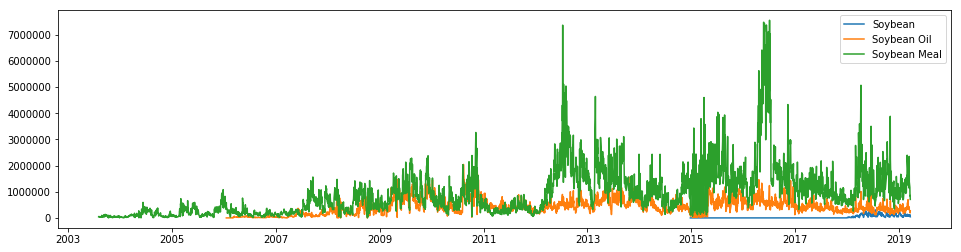

In [17]:
m_volume=m_data['Volume']['2003/8/4':'2019/3/22']
y_volume=y_data['Volume']['2006/1/18':'2019/3/22']
b_volume=b_data['Volume']['2014/12/23':'2019/3/22']
plt.figure(figsize=(16,4))
startDay='2018/5/1'
plt.plot(b_volume,label='Soybean')
plt.plot(y_volume,label='Soybean Oil')
plt.plot(m_volume,label='Soybean Meal')
plt.legend(loc='upper right')

# 跑us大豆與中國大豆的相關性
Q:us大豆沒有2017年以後的資料

In [18]:
datapath5=r'C:\Users\User\Desktop\程式交易\歷史資料\美國\@S-分鐘-成交價.txt'
us_soybean = pd.read_csv(datapath5,sep = ',',engine='python',encoding = 'utf-8')
us_soybean.columns=(['date','time','Open','High','Low','Close','Volume'])
us_soybean['Date']=us_soybean['date']+' '+us_soybean['time']
us_soybean=us_soybean.drop('time',axis=1)
us_soybean['date']=pd.to_datetime(us_soybean['date'])
us_soybean.set_index('date' , inplace=True)

us_soybean_open=us_soybean.loc[:,'Open'].resample(size).first().dropna()
us_soybean_high=us_soybean.loc[:,'High'].resample(size).max().dropna()
us_soybean_low=us_soybean.loc[:,'Low'].resample(size).min().dropna()
us_soybean_close=us_soybean.loc[:,'Close'].resample(size).last().dropna()
us_soybean_volumn=us_soybean.loc[:,'Volume'].resample(size).sum().dropna()
us_soybean=pd.concat([us_soybean_open,us_soybean_high,us_soybean_close,us_soybean_low,us_soybean_volumn],axis=1).dropna()
us_soybean['Return(%)']=(us_soybean['Close']-us_soybean['Close'].shift(1))/us_soybean['Close'].shift(1)*100

us_soybean

,Open,High,Close,Low,Volume,Return(%)
date,,,,,,
2002-11-03,-290.00,-289.50,-290.00,-291.50,392,NaN
2002-11-04,-290.00,-283.00,-283.75,-290.00,858,-2.155172e+00
2002-11-05,-283.50,-282.75,-284.50,-285.50,1531,2.643172e-01
2002-11-06,-285.50,-280.75,-281.50,-285.50,656,-1.054482e+00
2002-11-07,-281.75,-279.50,-290.00,-290.75,818,3.019538e+00
2002-11-08,-290.00,-289.50,-291.00,-291.25,183,3.448276e-01
2002-11-10,-299.50,-299.00,-299.50,-300.75,665,2.920962e+00
2002-11-11,-299.50,-284.50,-286.75,-300.50,1301,-4.257095e+00
2002-11-12,-287.50,-284.75,-297.50,-298.00,891,3.748910e+00


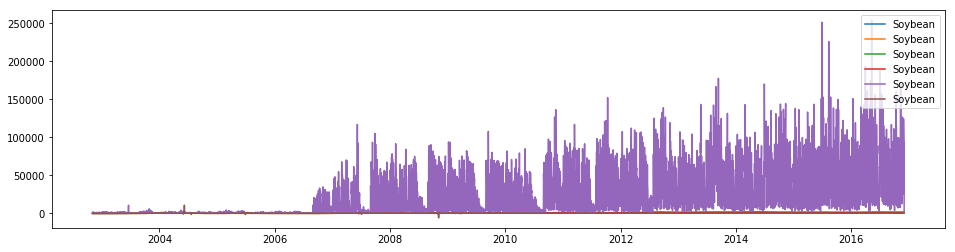

In [19]:
plt.figure(figsize=(16,4))
plt.plot(us_soybean,label='Soybean')
plt.legend(loc='upper right')

# 匯入美國資料

In [20]:
datapath10=r'C:\Users\User\Desktop\@S-日-成交價.txt'
us_allsoybean = pd.read_csv(datapath10,sep = ',',engine='python',encoding = 'utf-8')
us_allsoybean.columns=(['date','Open','High','Low','Close','Volume'])
us_allsoybean['date']=pd.to_datetime(us_allsoybean['date'])
us_allsoybean.set_index('date' , inplace=True)

In [21]:
df=[]
df=pd.DataFrame(df)
startday='2010/1/1'
endday='2016/12/20'
df['b']=b_data['Close'][startday:endday]
#df['us_soybean']=us_soybean['Close'][startday:endday]
df['us_allsoybean']=us_allsoybean['Close'][startday:endday]
df['m']=m_data['Close'][startday:endday]
df['m_return']=(df['m']-df['m'].shift(1))/df['m'].shift(1)
df['us_allsoybean_return']=((df['us_allsoybean']-df['us_allsoybean'].shift(1))/df['us_allsoybean'].shift(1)).shift(1)
df.corr()

,b,us_allsoybean,m,m_return,us_allsoybean_return
b,1.000000,-0.497774,-0.734003,0.025604,0.036791
us_allsoybean,-0.497774,1.000000,0.923741,0.035920,0.016650
m,-0.734003,0.923741,1.000000,0.026331,0.005529
m_return,0.025604,0.035920,0.026331,1.000000,0.411650
us_allsoybean_return,0.036791,0.016650,0.005529,0.411650,1.000000


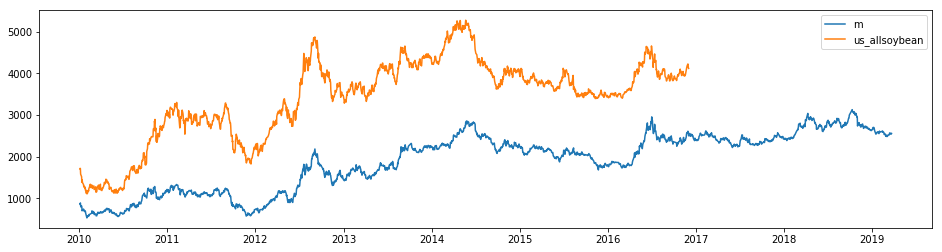

In [22]:
plt.figure(figsize=(16,4))
plt.plot(m_data['Close']['2010/1/1':],label='m')
plt.plot(4*us_allsoybean['Close']['2010/1/1':],label='us_allsoybean')
plt.legend(loc='upper right')

In [23]:
profit5=[]
profit5=pd.DataFrame(profit)
profit = m_data['Close']-

SyntaxError: invalid syntax (<ipython-input-23-2dfaa55c2519>, line 3)